# Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring, model, fe
%reload_ext autoreload

# Load data

In [3]:
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]
X_s, y_s = fe.imba(X, y,'smote')
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s,
                                                    test_size = 0.3, random_state=None)

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Number of neighbors to be considered for each sample 48

SMOTE ratio
DEATH_EVENT
1              203
0              203
dtype: int64


# Training with CV

In [8]:
list_model = ['random_forest',"adaboost","gb","xgb","naive_bayes",'lr']
list_model = ['all']

In [16]:
result,proba = model.cv_model_train(X_train_s.to_numpy(), y_train_s.to_numpy(),
                                      list_model,5)

Finished training for model:
Decision Tree
Random Forest
Ada Boosting
Gradient Boosting
Extra Gradient Boosting
Extra Tree
LGBM
KNN
SVM_linear
SVM_RBF
SVM_sigmoid
Logistic Regression
ANN
Naive Bayes
Linear Discriminant Analysis
SGD


In [17]:
result

,Method,accuracy,accuracy_std,balanced_acc,balanced_acc_std,F1,F1_std,F2,F2_std,AUC,AUC_std,Recall,Recall_std,Precision,Precision_std,Fit Time,Pred Time
0,Random Forest,0.8663,0.0526,0.8621,0.0535,0.8660,0.0523,0.8588,0.0777,0.9369,0.0339,0.8611,0.0840,0.8531,0.0731,0.2210,0.0202
1,Extra Gradient Boosting,0.8697,0.0345,0.8713,0.0336,0.8694,0.0345,0.8739,0.0470,0.9346,0.0386,0.8790,0.0638,0.8650,0.0672,0.0618,0.0050
2,LGBM,0.8416,0.0245,0.8473,0.0296,0.8416,0.0247,0.8277,0.0605,0.9321,0.0458,0.8257,0.0844,0.8538,0.0738,0.0342,0.0042
3,Gradient Boosting,0.8556,0.0301,0.8567,0.0309,0.8557,0.0302,0.8599,0.0335,0.9157,0.0523,0.8642,0.0393,0.8459,0.0461,0.1208,0.0040
4,Extra Tree,0.8697,0.0284,0.8647,0.0342,0.8687,0.0293,0.8620,0.0466,0.9088,0.0491,0.8605,0.0641,0.8764,0.0384,0.1732,0.0200
5,Linear Discriminant Analysis,0.8276,0.0352,0.8274,0.0370,0.8277,0.0357,0.8358,0.0223,0.8873,0.0642,0.8427,0.0224,0.8128,0.0586,0.0070,0.0060
6,Ada Boosting,0.8555,0.0443,0.8579,0.0437,0.8559,0.0438,0.8562,0.0498,0.8832,0.0656,0.8621,0.0521,0.8419,0.0912,0.0992,0.0162
7,Logistic Regression,0.7922,0.0563,0.7915,0.0569,0.7915,0.0567,0.7851,0.0636,0.8743,0.0659,0.7847,0.0739,0.7938,0.0584,0.0292,0.0038
8,Decision Tree,0.7959,0.0298,0.7981,0.0307,0.7961,0.0287,0.7839,0.0509,0.8370,0.0463,0.7846,0.0625,0.7990,0.1012,0.0012,0.0034
9,Naive Bayes,0.7888,0.0379,0.7889,0.0385,0.7891,0.0381,0.7817,0.0259,0.8147,0.0619,0.7806,0.0334,0.7894,0.0378,0.0044,0.0054


# Training model with default setting

## classification

In [9]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train_s, X_test_s, y_train_s, y_test_s,list_model=list_model)

we have done with these models:
Decision Tree
Random Forest
Adaboost_Classifier
Gradient_boosting_Classifier
Xgboost
extra_tree
lightgbm
K-Nearest Neighbors
SVM_Linear
SVM_RBF
SVM_sigmoid
Logistic_Regression
ANN
Naive Bayes
LDA
SGD


In [28]:
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(),
 XGBClassifier(),
 LGBMClassifier(),
 KNeighborsClassifier(n_jobs=-1),
 SVC(class_weight='balanced', probability=True),
 SVC(probability=True),
 SVC(kernel='sigmoid', probability=True),
 LogisticRegression(),
 MLPClassifier(),
 GaussianNB(),
 LinearDiscriminantAnalysis(),
 SGDClassifier(loss='log')]

comfusion matrix = 
[[49  7]
 [12 54]]


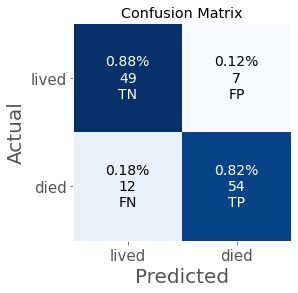


accuracy_score =  0.8443
balanced_accuracy_score =  0.8466

precision score =  0.8852
average precision score =  0.8227
recall score =  0.8182
Brier score loss (the smaller the better) =  0.1047

F1 score =  0.8504
F2 score =  0.8308
F3 score =  0.8244
F_beta score (0.5) =  0.871
Matthews Correlation Coefficient score =  0.6908

AUC of Precision-Recall Curve on Testing =  0.944
Best Threshold for Precision-Recall Curve = 0.410000
F-Score = 0.894
AUC of ROC =  0.9348

Best Threshold for ROC = 0.410000
G-Mean = 0.866
Best Threshold with Youden’s J statistic = 0.410000

Cohens kappa =  0.6885
Gini =  0.888

Expected Approval Rate =  0.5
Expected Default Rate =  0.1148

classification_report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        56
           1       0.89      0.82      0.85        66

    accuracy                           0.84       122
   macro avg       0.84      0.85      0.84       122
weighted avg       0.85      0

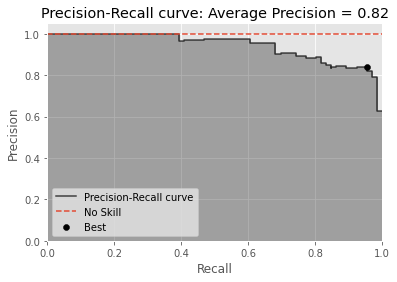

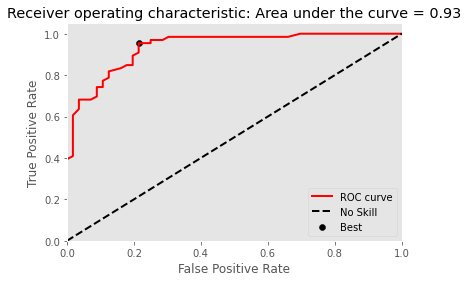


time span=  0:00:00.156998


In [10]:
scoring.print_score(y_test_s,pred_model[1],y_probs=probs_model[1],
                    types='classification',labels=['lived','died'],
                    time1=time_1[1],time2=time_2[1],
                    X_train=None, y_train=None,X_test=None)

# Training linear model with default setting

In [6]:
# Fit Ordinary Least Squares: OLS
csv = pd.read_csv('E:/gitlab/machine-learning/dataset/Advertising.csv', index_col=0)

In [31]:
X = csv[['TV', 'radio']]
y = csv['sales']
list_model = ['all']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=None)

In [63]:
models,names_model,probs_model,probs_dual_model,probs_bool_model,pred_model,time_1,time_2 = model.linear_modeling(
    X_train, X_test, y_train, y_test,list_model=list_model)

we have done with these models:
Linear Regression
Ridge L2-regularization
Lasso L1-regularization
Elastic Net


,Eval_params,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net
0,Mean Absolute Percentage Error (MAPE),19.98,19.98,19.98,19.97
1,Symmetric mean absolute percentage error (SMAPE),12.7436,12.7435,12.7422,12.74
2,R2,84.5901,84.5884,84.5784,84.5537
3,Mean Absolute Error (MAE),1.348,1.3481,1.349,1.3511
4,Median Absolute Error (MAE),1.1156,1.1163,1.1201,1.1289
5,Mean Square Error (MSE),3.6381,3.6385,3.6409,3.6467
6,Root Mean Absolute Error (RMAE),1.161,1.1611,1.1615,1.1624
7,Root Mean Absolute Error (RMSE),1.9074,1.9075,1.9081,1.9096
8,Mean Absolute Scaled Error (MASE),0.21,0.21,0.2101,0.2104
9,Median absolute deviation,1.63,1.63,1.63,1.62


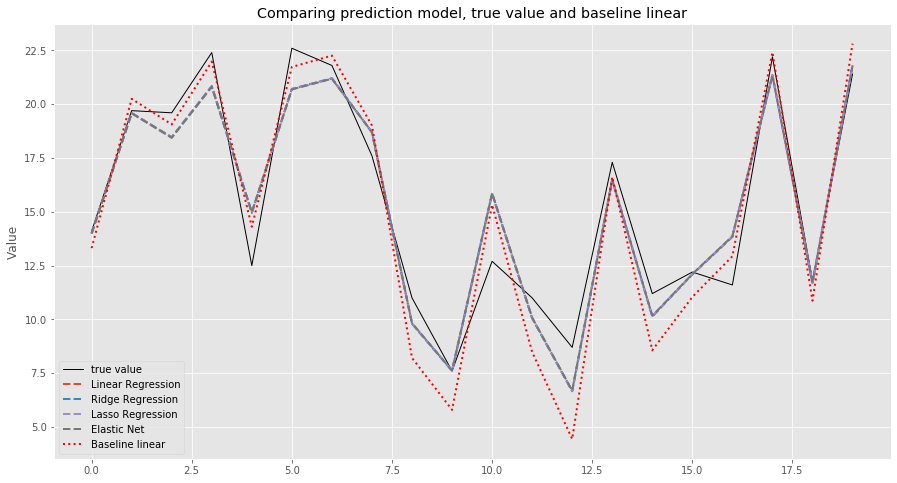

In [80]:
res= scoring.print_score_detail(y_test,pred_model,y_probs=probs_model,names_model=names_model,
                    types='regression',
                    time1=time_1,time2=time_2,
                    X_train=X_train, y_train=y_train,X_test=X_test)

# Cross validation at training data with single selected scoring

In [77]:
model.cv_train_simple(models,names_model,X_train_s, y_train_s,'accuracy',5)

,0,1,2,3,4,mean_cv,std_cv
decision_tree,0.824561,0.807018,0.842105,0.789474,0.732143,0.799060,0.037779
RandomForestClassifier,0.877193,0.859649,0.894737,0.929825,0.839286,0.880138,0.030917
Adaboost_Classifier,0.807018,0.842105,0.912281,0.894737,0.785714,0.848371,0.048805
Gradient_boosting_Classifier,0.877193,0.877193,0.912281,0.894737,0.839286,0.880138,0.024218
Xgboost,0.824561,0.912281,0.929825,0.894737,0.821429,0.876566,0.045137
extra_tree,0.824561,0.912281,0.929825,0.894737,0.821429,0.876566,0.045137
lightgbm,0.824561,0.912281,0.877193,0.912281,0.803571,0.865977,0.044774
K_Nearest_Neighbors,0.543860,0.596491,0.684211,0.578947,0.535714,0.587845,0.053090
SVM_Linear,0.508772,0.473684,0.526316,0.543860,0.553571,0.521241,0.028283
SVM_RBF,0.526316,0.508772,0.526316,0.543860,0.553571,0.531767,0.015556


# Dynamic Ensemble Selection (DES)

evaluate knorau predictions at accuracy
> k at 2 | mean = 0.824 | std = 0.069
> k at 3 | mean = 0.824 | std = 0.074
> k at 4 | mean = 0.818 | std = 0.071
> k at 5 | mean = 0.829 | std = 0.063
> k at 6 | mean = 0.834 | std = 0.073
> k at 7 | mean = 0.827 | std = 0.082
> k at 8 | mean = 0.835 | std = 0.067
> k at 9 | mean = 0.842 | std = 0.073
> k at 10 | mean = 0.838 | std = 0.073
> k at 11 | mean = 0.839 | std = 0.066
> k at 12 | mean = 0.822 | std = 0.058
> k at 13 | mean = 0.822 | std = 0.066
> k at 14 | mean = 0.811 | std = 0.059
> k at 15 | mean = 0.827 | std = 0.077
> k at 16 | mean = 0.826 | std = 0.070
> k at 17 | mean = 0.835 | std = 0.060
> k at 18 | mean = 0.833 | std = 0.061
> k at 19 | mean = 0.841 | std = 0.060
> k at 20 | mean = 0.829 | std = 0.077
> k at 21 | mean = 0.844 | std = 0.089


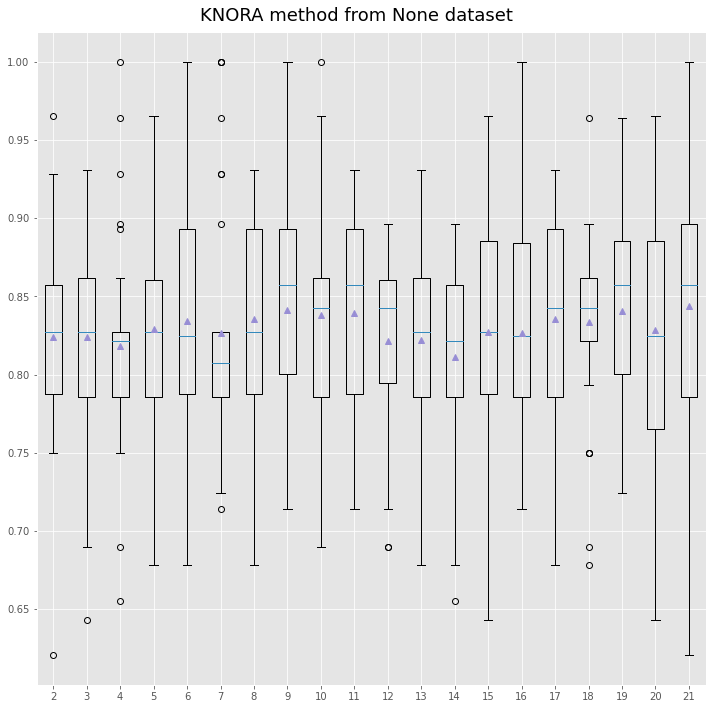

In [7]:
model.dse(X_train_s,y_train_s,X_test=None,y_test=None,action='k',types='knorau',k_value=22,scoring='accuracy',title=None,footnote=None)

In [14]:
y_pred,y_proba = model.dse(X_train_s, y_train_s, X_test_s, y_test_s,
                           action='final',types='knorau',k_value=9,
                           scoring='accuracy',title=None,footnote=None)

evaluate knorau predictions
> Accuracy model knorau: 0.803
evaluate contributing models
> Accuracy model LogisticRegression: 0.828
> Accuracy model DecisionTreeClassifier: 0.803


# Ensemble method (hard and soft voting)

>knn1 | mean = 0.524 | std = 0.082
>knn3 | mean = 0.524 | std = 0.073
>knn5 | mean = 0.534 | std = 0.072
>knn7 | mean = 0.517 | std = 0.075
>knn9 | mean = 0.512 | std = 0.076
>hard_voting | mean = 0.537 | std = 0.075


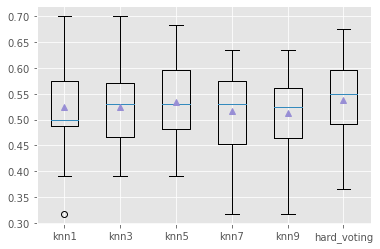

In [11]:
model_hard = model.voting_ensembles(X_s, y_s,'check_voting','hard')

In [56]:
model_soft = model.voting_ensembles(X_train_s,y_train_s,'predict','soft')

In [57]:
y_pred = model_soft.predict(X_test_s)
y_prob = model_soft.predict_proba(X_test_s)[:, 1]

comfusion matrix = 
[[ 0 67]
 [ 0 55]]


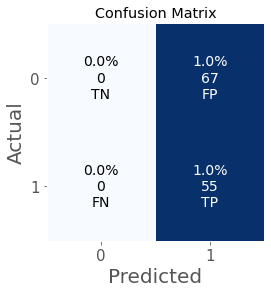


accuracy_score =  0.4508
balanced_accuracy_score =  0.5

precision score =  0.4508
average precision score =  0.4508
recall score =  1.0
Brier score loss (the smaller the better) =  0.2505

F1 score =  0.6215
F2 score =  0.8041
F3 score =  0.8914
F_beta score (0.5) =  0.5064
Matthews Correlation Coefficient score =  0.0

AUC of Precision-Recall Curve on Testing =  0.374
Best Threshold for Precision-Recall Curve = 0.504800
F-Score = nan
AUC of ROC =  0.4195

Best Threshold for ROC = 0.504800
G-Mean = 0.477
Best Threshold with Youden’s J statistic = 0.504800

Cohens kappa =  0.0
Gini =  -0.252

Expected Approval Rate =  1.0
Expected Default Rate =  0.5492

classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.45      1.00      0.62        55

    accuracy                           0.45       122
   macro avg       0.23      0.50      0.31       122
weighted avg       0.20      0.45      0.2

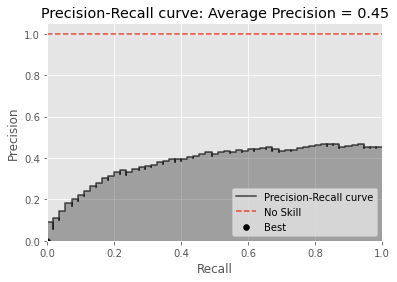

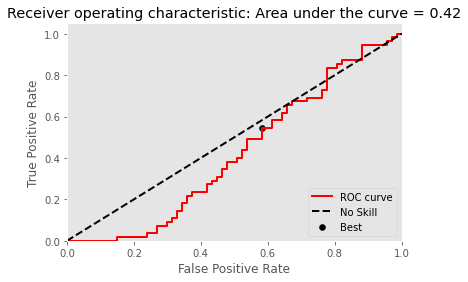


time span=  1


In [58]:
scoring.print_score(y_test_s,y_pred,y_probs=y_prob,types='classification',labels=[0,1],time1=1,time2=2)

# Voting ensembles weighted

## model classification

In [15]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_s, y_train_s, X_test_s, y_test_s,
                                "soft",'classification')

fit and evaluate each model
>rank 2 -> LR: 82.787
>rank 1 -> DT: 77.049
>rank 3 -> Bayes: 82.787
Weighted Avg Accuracy: 86.885
Voting Accuracy: 86.885
Ranking Weighted Accuracy: 84.426


In [17]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test_s)
y_prob = model_weighted_ensemble.predict_proba(X_test_s)[:,1]

comfusion matrix = 
[[61  6]
 [10 45]]


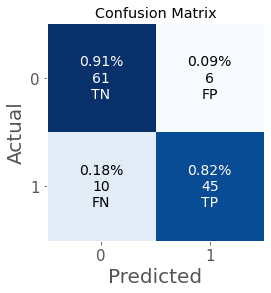


accuracy_score =  0.8689
balanced_accuracy_score =  0.8643

precision score =  0.8824
average precision score =  0.8039
recall score =  0.8182
Brier score loss (the smaller the better) =  0.1243

F1 score =  0.8491
F2 score =  0.8303
F3 score =  0.8242
F_beta score (0.5) =  0.8687
Matthews Correlation Coefficient score =  0.735

AUC of Precision-Recall Curve on Testing =  0.8786
Best Threshold for Precision-Recall Curve = 0.443000
F-Score = 0.862
AUC of ROC =  0.8963

Best Threshold for ROC = 0.443000
G-Mean = 0.875
Best Threshold with Youden’s J statistic = 0.443000

Cohens kappa =  0.7334
Gini =  0.7572

Expected Approval Rate =  0.418
Expected Default Rate =  0.1176

classification_report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        67
           1       0.88      0.82      0.85        55

    accuracy                           0.87       122
   macro avg       0.87      0.86      0.87       122
weighted avg       0.87   

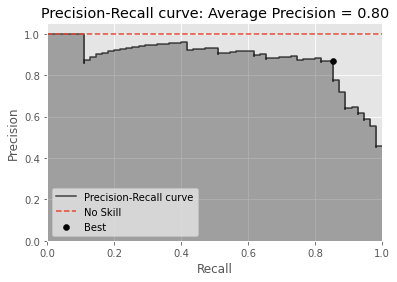

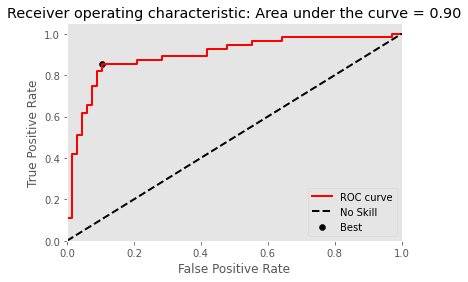


time span=  1


In [19]:
scoring.print_score(y_test_s,y_pred,y_prob,
                    types='classification',labels=[0,1],time1=1,time2=2)

# Stacking model

> knn | mean accuracy= 0.546 | std accuracy= 0.0612
> svm | mean accuracy= 0.5 | std accuracy= 0.0292
> lda | mean accuracy= 0.8259 | std accuracy= 0.061
> lr | mean accuracy= 0.8071 | std accuracy= 0.065
> naive_bayes | mean accuracy= 0.7947 | std accuracy= 0.0593
> tree | mean accuracy= 0.8317 | std accuracy= 0.065
> rf | mean accuracy= 0.8817 | std accuracy= 0.0533
> ada | mean accuracy= 0.84 | std accuracy= 0.0536
> stacking | mean accuracy= 0.8636 | std accuracy= 0.0432


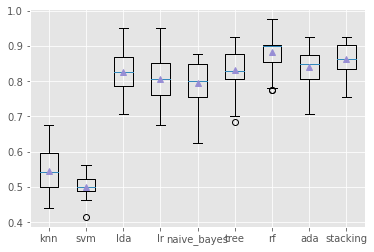

In [26]:
model_hard = model.stack_ensembles(X_s, y_s,'check_voting',cv_model=3)

In [27]:
model_stack = model.stack_ensembles(X_train_s,y_train_s,'predict',cv_model=3)

In [28]:
y_pred = model_stack.predict(X_test_s)
y_prob = model_stack.predict_proba(X_test_s)[:, 1]

comfusion matrix = 
[[57  6]
 [ 9 50]]


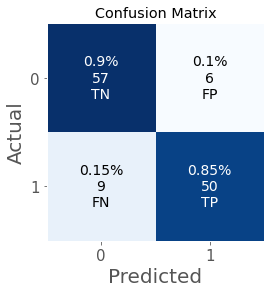


accuracy_score =  0.877
balanced_accuracy_score =  0.8761
Logloss =  0.3052

precision score =  0.8929
average precision score =  0.8304
recall score =  0.8475
Brier score loss (the smaller the better) =  0.0929

F1 score =  0.8696
F2 score =  0.8562
F3 score =  0.8518
F_beta score (0.5) =  0.8834
Matthews Correlation Coefficient score =  0.7544

AUC of Precision-Recall Curve on Testing =  0.9408
Best Threshold for Precision-Recall Curve = 0.396100
F-Score = 0.881
AUC of ROC =  0.9473

Best Threshold for ROC = 0.396100
G-Mean = 0.885
Best Threshold with Youden’s J statistic = 0.396100

Cohens kappa =  0.7534
Gini =  0.8815

Expected Approval Rate =  0.459
Expected Default Rate =  0.1071

classification_report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.89      0.85      0.87        59

    accuracy                           0.88       122
   macro avg       0.88      0.88      0.88       122
weighted

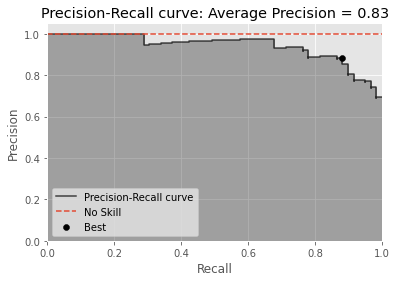

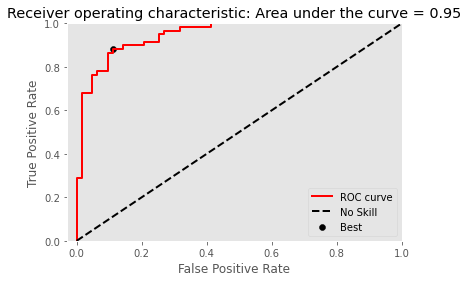


time span=  1


In [29]:
scoring.print_score(y_test_s,y_pred,y_probs=y_prob,types='classification',labels=[0,1],time1=1,time2=2)

## model regression

In [26]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [27]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'regression')

fit and evaluate each model
>rank 3 -> knn: -10016.853
>rank 2 -> cart: -13302.265
>rank 1 -> svm: -13819.499
Weighted Avg MAE: 105.010
Voting MAE: 102.964
Ranking Weighted MAE: 97.150


In [28]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)


Mean Absolute Percentage Error (MAPE) = 12.93 %
R2                                    = 66.17 %
Mean Absolute Error (MAE)             = 105.01
Median Absolute Error (MAE)           = 85.61
Mean Square Error (MAE)               = 18074.82
Root Mean Absolute Error (RMAE)       = 10.25
Root Mean Absolute Error (RMSE)       = 134.44
Max Error                             = 532.49
Tracking Signal                        = [-0.17 -1.61 -0.42 ... -0.02  0.31 -0.18]


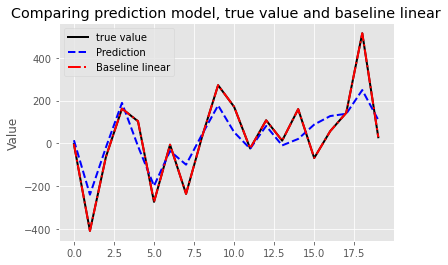


time span=  1


In [30]:
scoring.print_score(y_test,y_pred,y_prob,
                    types='regression',labels=None,time1=1,time2=2,
                    X_train=X_train_full, y_train=y_train_full,X_test=X_test)

# CatBoost Model

## Regression

In [211]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

In [212]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, train_size=0.9, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [213]:
booster,test_preds = model.catboost_model(X_train,X_test,y_train,y_test,types='regression',
                     params={'iterations':100, 'verbose':10, 'loss_function':'RMSE'},
                    feature_names=boston.feature_names,eval_mat="R2")

Learning rate set to 0.166668
0:	learn: 8.0520453	test: 10.1798347	best: 10.1798347 (0)	total: 3.14ms	remaining: 311ms
1:	learn: 7.2691505	test: 9.5588954	best: 9.5588954 (1)	total: 4.42ms	remaining: 216ms
2:	learn: 6.5597180	test: 8.8663383	best: 8.8663383 (2)	total: 5.64ms	remaining: 182ms
3:	learn: 6.0495692	test: 8.5415931	best: 8.5415931 (3)	total: 6.96ms	remaining: 167ms
4:	learn: 5.6045538	test: 8.1044629	best: 8.1044629 (4)	total: 8.36ms	remaining: 159ms
5:	learn: 5.2815877	test: 7.7823039	best: 7.7823039 (5)	total: 9.58ms	remaining: 150ms
6:	learn: 4.8750733	test: 7.4243311	best: 7.4243311 (6)	total: 10.8ms	remaining: 144ms
7:	learn: 4.5099906	test: 7.0379020	best: 7.0379020 (7)	total: 12.1ms	remaining: 139ms
8:	learn: 4.3059878	test: 6.8147244	best: 6.8147244 (8)	total: 13.5ms	remaining: 136ms
9:	learn: 4.0527170	test: 6.5703040	best: 6.5703040 (9)	total: 15ms	remaining: 135ms
10:	learn: 3.8810707	test: 6.4769275	best: 6.4769275 (10)	total: 16.7ms	remaining: 135ms
11:	learn: 



Train R2 : 0.97
Test  R2 : 0.82


In [214]:
booster,test_preds = model.catboost_model(X_train,X_test,y_train,y_test,types='regression',
                     params={'iterations':100, 'verbose':10, 'loss_function':'RMSE'},
                    feature_names=boston.feature_names,shrink=75,eval_mat="R2")

Learning rate set to 0.166668
0:	learn: 8.0520453	test: 10.1798347	best: 10.1798347 (0)	total: 1.69ms	remaining: 167ms
1:	learn: 7.2691505	test: 9.5588954	best: 9.5588954 (1)	total: 3.62ms	remaining: 178ms
2:	learn: 6.5597180	test: 8.8663383	best: 8.8663383 (2)	total: 6.23ms	remaining: 201ms
3:	learn: 6.0495692	test: 8.5415931	best: 8.5415931 (3)	total: 7.87ms	remaining: 189ms
4:	learn: 5.6045538	test: 8.1044629	best: 8.1044629 (4)	total: 9.58ms	remaining: 182ms
5:	learn: 5.2815877	test: 7.7823039	best: 7.7823039 (5)	total: 11ms	remaining: 173ms
6:	learn: 4.8750733	test: 7.4243311	best: 7.4243311 (6)	total: 12.4ms	remaining: 165ms
7:	learn: 4.5099906	test: 7.0379020	best: 7.0379020 (7)	total: 13.8ms	remaining: 159ms
8:	learn: 4.3059878	test: 6.8147244	best: 6.8147244 (8)	total: 15.4ms	remaining: 155ms
9:	learn: 4.0527170	test: 6.5703040	best: 6.5703040 (9)	total: 16.8ms	remaining: 151ms
10:	learn: 3.8810707	test: 6.4769275	best: 6.4769275 (10)	total: 18.9ms	remaining: 153ms
11:	learn: 

98:	learn: 1.2753492	test: 4.5610429	best: 4.5389627 (74)	total: 152ms	remaining: 1.54ms
99:	learn: 1.2619128	test: 4.5646310	best: 4.5389627 (74)	total: 154ms	remaining: 0us

bestTest = 4.538962725
bestIteration = 74

Shrink model to first 75 iterations.


Train R2 : 0.97
Test  R2 : 0.82


In [215]:
params = {'iterations':[5,10,50,100],
         'learning_rate':[0.01, 0.03, 0.1,1.0],
         'bootstrap_type':['Bayesian','Bernoulli','MVS','Poisson','No'],
         'task_type':['GPU']}

In [216]:
cv_results,booster,test_preds = model.catboost_model(X_train,X_test,y_train,y_test,
                                                     types='regression',
                                                     params=params,eval_mat="R2",
                                                     feature_names=boston.feature_names,tunning="gridsearch")

0:	learn: 23.9183593	test: 23.1404518	best: 23.1404518 (0)	total: 20.6ms	remaining: 82.4ms
1:	learn: 23.7007641	test: 22.9317437	best: 22.9317437 (1)	total: 32.9ms	remaining: 49.3ms
2:	learn: 23.4846677	test: 22.7252311	best: 22.7252311 (2)	total: 46.6ms	remaining: 31.1ms
3:	learn: 23.2706110	test: 22.5188642	best: 22.5188642 (3)	total: 59.5ms	remaining: 14.9ms
4:	learn: 23.0612120	test: 22.3174043	best: 22.3174043 (4)	total: 75.7ms	remaining: 0us
bestTest = 22.31740431
bestIteration = 4
0:	loss: 22.3174043	best: 22.3174043 (0)	total: 1.25s	remaining: 1m 38s
0:	learn: 23.9186052	test: 23.1415871	best: 23.1415871 (0)	total: 19.9ms	remaining: 79.5ms
1:	learn: 23.7010213	test: 22.9328855	best: 22.9328855 (1)	total: 33.2ms	remaining: 49.7ms
2:	learn: 23.4934634	test: 22.7247239	best: 22.7247239 (2)	total: 43.4ms	remaining: 29ms
3:	learn: 23.2969568	test: 22.5241733	best: 22.5241733 (3)	total: 52.6ms	remaining: 13.1ms
4:	learn: 23.0912947	test: 22.3266944	best: 22.3266944 (4)	total: 65.9ms	

0:	learn: 5.4432707	test: 4.2360185	best: 4.2360185 (0)	total: 18.4ms	remaining: 73.4ms
1:	learn: 4.8946436	test: 4.0490172	best: 4.0490172 (1)	total: 36.3ms	remaining: 54.4ms
2:	learn: 4.5891112	test: 3.9591407	best: 3.9591407 (2)	total: 53.3ms	remaining: 35.5ms
3:	learn: 3.6882209	test: 3.2556334	best: 3.2556334 (3)	total: 71.2ms	remaining: 17.8ms
4:	learn: 3.4018335	test: 3.2672747	best: 3.2556334 (3)	total: 87.4ms	remaining: 0us
bestTest = 3.255633363
bestIteration = 3
15:	loss: 3.2556334	best: 3.2556334 (15)	total: 4.52s	remaining: 18.1s
0:	learn: 5.4464555	test: 4.6295932	best: 4.6295932 (0)	total: 17.2ms	remaining: 68.8ms
1:	learn: 4.8804422	test: 4.2695915	best: 4.2695915 (1)	total: 33.1ms	remaining: 49.6ms
2:	learn: 4.3259372	test: 4.3397293	best: 4.2695915 (1)	total: 49.4ms	remaining: 32.9ms
3:	learn: 3.3642821	test: 3.5212257	best: 3.5212257 (3)	total: 64.9ms	remaining: 16.2ms
4:	learn: 3.1770612	test: 3.7791514	best: 3.5212257 (3)	total: 80.3ms	remaining: 0us
bestTest = 3.5

0:	learn: 23.4796187	test: 22.7187247	best: 22.7187247 (0)	total: 18.2ms	remaining: 163ms
1:	learn: 22.8399955	test: 22.1052715	best: 22.1052715 (1)	total: 29.4ms	remaining: 117ms
2:	learn: 22.2434791	test: 21.5054020	best: 21.5054020 (2)	total: 42.4ms	remaining: 98.9ms
3:	learn: 21.6638693	test: 20.9891359	best: 20.9891359 (3)	total: 55.3ms	remaining: 83ms
4:	learn: 21.0807192	test: 20.4614929	best: 20.4614929 (4)	total: 70.4ms	remaining: 70.4ms
5:	learn: 20.5043089	test: 19.9147587	best: 19.9147587 (5)	total: 81.7ms	remaining: 54.5ms
6:	learn: 19.9573861	test: 19.4058986	best: 19.4058986 (6)	total: 97.6ms	remaining: 41.8ms
7:	learn: 19.4186189	test: 18.8793711	best: 18.8793711 (7)	total: 110ms	remaining: 27.6ms
8:	learn: 18.8982827	test: 18.3762895	best: 18.3762895 (8)	total: 123ms	remaining: 13.6ms
9:	learn: 18.3889797	test: 17.8913068	best: 17.8913068 (9)	total: 136ms	remaining: 0us
bestTest = 17.89130678
bestIteration = 9
26:	loss: 17.8913068	best: 3.2556334 (15)	total: 7.31s	rema

0:	learn: 5.4432707	test: 4.2360185	best: 4.2360185 (0)	total: 17.6ms	remaining: 158ms
1:	learn: 4.8946436	test: 4.0490172	best: 4.0490172 (1)	total: 33.4ms	remaining: 133ms
2:	learn: 4.5891112	test: 3.9591407	best: 3.9591407 (2)	total: 49.1ms	remaining: 115ms
3:	learn: 3.6882209	test: 3.2556334	best: 3.2556334 (3)	total: 64.5ms	remaining: 96.8ms
4:	learn: 3.4018335	test: 3.2672747	best: 3.2556334 (3)	total: 80.2ms	remaining: 80.2ms
5:	learn: 3.3334905	test: 3.2387847	best: 3.2387847 (5)	total: 95.3ms	remaining: 63.5ms
6:	learn: 3.0434368	test: 3.2678379	best: 3.2387847 (5)	total: 111ms	remaining: 47.5ms
7:	learn: 2.9966685	test: 3.3039280	best: 3.2387847 (5)	total: 127ms	remaining: 31.8ms
8:	learn: 2.9450777	test: 3.2757919	best: 3.2387847 (5)	total: 143ms	remaining: 15.9ms
9:	learn: 2.9211362	test: 3.2443255	best: 3.2387847 (5)	total: 159ms	remaining: 0us
bestTest = 3.238784748
bestIteration = 5
35:	loss: 3.2387847	best: 3.2387847 (35)	total: 9.85s	remaining: 12s
0:	learn: 5.4464555	

40:	learn: 16.7179069	test: 16.2340680	best: 16.2340680 (40)	total: 576ms	remaining: 126ms
41:	learn: 16.5773997	test: 16.1004624	best: 16.1004624 (41)	total: 594ms	remaining: 113ms
42:	learn: 16.4307375	test: 15.9592410	best: 15.9592410 (42)	total: 606ms	remaining: 98.7ms
43:	learn: 16.2868526	test: 15.8198144	best: 15.8198144 (43)	total: 618ms	remaining: 84.2ms
44:	learn: 16.1432362	test: 15.6790733	best: 15.6790733 (44)	total: 630ms	remaining: 69.9ms
45:	learn: 16.0024258	test: 15.5447638	best: 15.5447638 (45)	total: 645ms	remaining: 56.1ms
46:	learn: 15.8635418	test: 15.4117655	best: 15.4117655 (46)	total: 660ms	remaining: 42.1ms
47:	learn: 15.7281717	test: 15.2778229	best: 15.2778229 (47)	total: 671ms	remaining: 27.9ms
48:	learn: 15.5919830	test: 15.1435652	best: 15.1435652 (48)	total: 683ms	remaining: 13.9ms
49:	learn: 15.4550982	test: 15.0122203	best: 15.0122203 (49)	total: 694ms	remaining: 0us
bestTest = 15.0122203
bestIteration = 49
40:	loss: 15.0122203	best: 3.2387847 (35)	to

39:	learn: 16.8970438	test: 16.4811930	best: 16.4811930 (39)	total: 577ms	remaining: 144ms
40:	learn: 16.7472436	test: 16.3335224	best: 16.3335224 (40)	total: 590ms	remaining: 130ms
41:	learn: 16.6018931	test: 16.1968873	best: 16.1968873 (41)	total: 601ms	remaining: 115ms
42:	learn: 16.4558705	test: 16.0540222	best: 16.0540222 (42)	total: 612ms	remaining: 99.7ms
43:	learn: 16.3110697	test: 15.9156464	best: 15.9156464 (43)	total: 627ms	remaining: 85.5ms
44:	learn: 16.1699423	test: 15.7758508	best: 15.7758508 (44)	total: 639ms	remaining: 71ms
45:	learn: 16.0313896	test: 15.6449906	best: 15.6449906 (45)	total: 652ms	remaining: 56.7ms
46:	learn: 15.8944345	test: 15.5127340	best: 15.5127340 (46)	total: 664ms	remaining: 42.4ms
47:	learn: 15.7601415	test: 15.3831796	best: 15.3831796 (47)	total: 676ms	remaining: 28.2ms
48:	learn: 15.6269339	test: 15.2610476	best: 15.2610476 (48)	total: 690ms	remaining: 14.1ms
49:	learn: 15.4924197	test: 15.1343074	best: 15.1343074 (49)	total: 703ms	remaining: 

27:	learn: 18.7978796	test: 18.2783960	best: 18.2783960 (27)	total: 404ms	remaining: 318ms
28:	learn: 18.6311336	test: 18.1266607	best: 18.1266607 (28)	total: 422ms	remaining: 305ms
29:	learn: 18.4649689	test: 17.9669406	best: 17.9669406 (29)	total: 437ms	remaining: 291ms
30:	learn: 18.3035071	test: 17.8147067	best: 17.8147067 (30)	total: 453ms	remaining: 278ms
31:	learn: 18.1432358	test: 17.6573814	best: 17.6573814 (31)	total: 467ms	remaining: 263ms
32:	learn: 17.9835698	test: 17.5011289	best: 17.5011289 (32)	total: 481ms	remaining: 248ms
33:	learn: 17.8241226	test: 17.3475169	best: 17.3475169 (33)	total: 498ms	remaining: 234ms
34:	learn: 17.6647064	test: 17.1920274	best: 17.1920274 (34)	total: 512ms	remaining: 219ms
35:	learn: 17.5079554	test: 17.0418605	best: 17.0418605 (35)	total: 524ms	remaining: 204ms
36:	learn: 17.3523142	test: 16.8928699	best: 16.8928699 (36)	total: 537ms	remaining: 189ms
37:	learn: 17.1999668	test: 16.7558535	best: 16.7558535 (37)	total: 552ms	remaining: 174ms

26:	learn: 11.8731934	test: 11.6875831	best: 11.6875831 (26)	total: 392ms	remaining: 334ms
27:	learn: 11.5833974	test: 11.4049370	best: 11.4049370 (27)	total: 404ms	remaining: 317ms
28:	learn: 11.3021428	test: 11.1557464	best: 11.1557464 (28)	total: 420ms	remaining: 304ms
29:	learn: 11.0302426	test: 10.8956066	best: 10.8956066 (29)	total: 433ms	remaining: 288ms
30:	learn: 10.7663154	test: 10.6665995	best: 10.6665995 (30)	total: 447ms	remaining: 274ms
31:	learn: 10.5155583	test: 10.4283160	best: 10.4283160 (31)	total: 464ms	remaining: 261ms
32:	learn: 10.2741325	test: 10.2038429	best: 10.2038429 (32)	total: 476ms	remaining: 245ms
33:	learn: 10.0324925	test: 9.9720118	best: 9.9720118 (33)	total: 495ms	remaining: 233ms
34:	learn: 9.7900698	test: 9.7359344	best: 9.7359344 (34)	total: 508ms	remaining: 218ms
35:	learn: 9.5647712	test: 9.5209929	best: 9.5209929 (35)	total: 520ms	remaining: 202ms
36:	learn: 9.3479271	test: 9.3114464	best: 9.3114464 (36)	total: 533ms	remaining: 187ms
37:	learn:

19:	learn: 15.0699797	test: 13.9038394	best: 13.9038394 (19)	total: 195ms	remaining: 292ms
20:	learn: 14.7699107	test: 13.5874287	best: 13.5874287 (20)	total: 205ms	remaining: 283ms
21:	learn: 14.4815538	test: 13.2830764	best: 13.2830764 (21)	total: 214ms	remaining: 272ms
22:	learn: 14.2045632	test: 12.9904529	best: 12.9904529 (22)	total: 223ms	remaining: 261ms
23:	learn: 13.9385979	test: 12.7092315	best: 12.7092315 (23)	total: 232ms	remaining: 252ms
24:	learn: 13.6833267	test: 12.4390953	best: 12.4390953 (24)	total: 241ms	remaining: 241ms
25:	learn: 13.4384216	test: 12.1797330	best: 12.1797330 (25)	total: 251ms	remaining: 231ms
26:	learn: 13.2035603	test: 11.9308368	best: 11.9308368 (26)	total: 261ms	remaining: 222ms
27:	learn: 12.9784288	test: 11.6921048	best: 11.6921048 (27)	total: 269ms	remaining: 212ms
28:	learn: 12.7627191	test: 11.4632429	best: 11.4632429 (28)	total: 279ms	remaining: 202ms
29:	learn: 12.5561266	test: 11.2439592	best: 11.2439592 (29)	total: 288ms	remaining: 192ms

13:	learn: 7.1750631	test: 7.0938094	best: 7.0938094 (13)	total: 205ms	remaining: 527ms
14:	learn: 6.6649902	test: 6.6174253	best: 6.6174253 (14)	total: 222ms	remaining: 519ms
15:	learn: 6.2384767	test: 6.2262280	best: 6.2262280 (15)	total: 239ms	remaining: 508ms
16:	learn: 5.8611135	test: 5.8473629	best: 5.8473629 (16)	total: 255ms	remaining: 494ms
17:	learn: 5.5288505	test: 5.5416346	best: 5.5416346 (17)	total: 270ms	remaining: 480ms
18:	learn: 5.2557295	test: 5.2546281	best: 5.2546281 (18)	total: 286ms	remaining: 467ms
19:	learn: 4.9840440	test: 4.9884159	best: 4.9884159 (19)	total: 303ms	remaining: 455ms
20:	learn: 4.7640448	test: 4.7805003	best: 4.7805003 (20)	total: 324ms	remaining: 447ms
21:	learn: 4.6046336	test: 4.5982725	best: 4.5982725 (21)	total: 334ms	remaining: 425ms
22:	learn: 4.4213514	test: 4.4407648	best: 4.4407648 (22)	total: 353ms	remaining: 414ms
23:	learn: 4.2710343	test: 4.2958912	best: 4.2958912 (23)	total: 366ms	remaining: 397ms
24:	learn: 4.1393607	test: 4.162

14:	learn: 6.8426495	test: 6.9116065	best: 6.9116065 (14)	total: 222ms	remaining: 517ms
15:	learn: 6.4011679	test: 6.5065078	best: 6.5065078 (15)	total: 237ms	remaining: 504ms
16:	learn: 5.9957439	test: 6.1134859	best: 6.1134859 (16)	total: 253ms	remaining: 490ms
17:	learn: 5.6624407	test: 5.7757812	best: 5.7757812 (17)	total: 266ms	remaining: 472ms
18:	learn: 5.3188820	test: 5.4720379	best: 5.4720379 (18)	total: 282ms	remaining: 460ms
19:	learn: 5.0179665	test: 5.2521706	best: 5.2521706 (19)	total: 297ms	remaining: 446ms
20:	learn: 4.7773385	test: 4.9984152	best: 4.9984152 (20)	total: 312ms	remaining: 431ms
21:	learn: 4.5619405	test: 4.7948110	best: 4.7948110 (21)	total: 325ms	remaining: 414ms
22:	learn: 4.3916488	test: 4.6687668	best: 4.6687668 (22)	total: 342ms	remaining: 401ms
23:	learn: 4.2243446	test: 4.5416746	best: 4.5416746 (23)	total: 358ms	remaining: 388ms
24:	learn: 4.1033370	test: 4.4237949	best: 4.4237949 (24)	total: 368ms	remaining: 368ms
25:	learn: 3.9279495	test: 4.336

14:	learn: 6.8562521	test: 6.9257419	best: 6.9257419 (14)	total: 222ms	remaining: 518ms
15:	learn: 6.4136712	test: 6.5203933	best: 6.5203933 (15)	total: 239ms	remaining: 508ms
16:	learn: 6.0072456	test: 6.1270800	best: 6.1270800 (16)	total: 256ms	remaining: 497ms
17:	learn: 5.6724102	test: 5.8031369	best: 5.8031369 (17)	total: 274ms	remaining: 488ms
18:	learn: 5.3649820	test: 5.4835377	best: 5.4835377 (18)	total: 295ms	remaining: 481ms
19:	learn: 5.0917036	test: 5.2035429	best: 5.2035429 (19)	total: 313ms	remaining: 469ms
20:	learn: 4.8240249	test: 4.9955514	best: 4.9955514 (20)	total: 330ms	remaining: 455ms
21:	learn: 4.6337744	test: 4.8044472	best: 4.8044472 (21)	total: 340ms	remaining: 433ms
22:	learn: 4.4458494	test: 4.6657750	best: 4.6657750 (22)	total: 358ms	remaining: 421ms
23:	learn: 4.2756475	test: 4.5354795	best: 4.5354795 (23)	total: 379ms	remaining: 411ms
24:	learn: 4.0848274	test: 4.3983775	best: 4.3983775 (24)	total: 400ms	remaining: 400ms
25:	learn: 3.9169072	test: 4.263

12:	learn: 2.4363394	test: 3.3319408	best: 3.2822733 (11)	total: 220ms	remaining: 626ms
13:	learn: 2.3886556	test: 3.3008342	best: 3.2822733 (11)	total: 236ms	remaining: 608ms
14:	learn: 2.3467860	test: 3.3643822	best: 3.2822733 (11)	total: 253ms	remaining: 589ms
15:	learn: 2.3364806	test: 3.3436682	best: 3.2822733 (11)	total: 269ms	remaining: 571ms
16:	learn: 2.3348288	test: 3.3238058	best: 3.2822733 (11)	total: 280ms	remaining: 543ms
17:	learn: 2.3238529	test: 3.3226037	best: 3.2822733 (11)	total: 295ms	remaining: 524ms
18:	learn: 2.3100802	test: 3.3215899	best: 3.2822733 (11)	total: 313ms	remaining: 510ms
19:	learn: 2.3034933	test: 3.3322504	best: 3.2822733 (11)	total: 328ms	remaining: 492ms
20:	learn: 2.2993237	test: 3.3384531	best: 3.2822733 (11)	total: 345ms	remaining: 476ms
21:	learn: 2.2979965	test: 3.3303167	best: 3.2822733 (11)	total: 359ms	remaining: 457ms
22:	learn: 2.2941634	test: 3.3314244	best: 3.2822733 (11)	total: 375ms	remaining: 441ms
23:	learn: 2.1943773	test: 3.360

18:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 193ms	remaining: 315ms
19:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 203ms	remaining: 305ms
20:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 214ms	remaining: 296ms
21:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 224ms	remaining: 285ms
22:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 235ms	remaining: 276ms
23:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 246ms	remaining: 266ms
24:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 255ms	remaining: 255ms
25:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 266ms	remaining: 245ms
26:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 276ms	remaining: 235ms
27:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 285ms	remaining: 224ms
28:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 295ms	remaining: 214ms
29:	learn: 8.5240404	test: 7.2792700	best: 

15:	learn: 20.8734556	test: 20.2052483	best: 20.2052483 (15)	total: 236ms	remaining: 1.24s
16:	learn: 20.6860143	test: 20.0205177	best: 20.0205177 (16)	total: 254ms	remaining: 1.24s
17:	learn: 20.5006543	test: 19.8543503	best: 19.8543503 (17)	total: 271ms	remaining: 1.23s
18:	learn: 20.3153791	test: 19.6755622	best: 19.6755622 (18)	total: 286ms	remaining: 1.22s
19:	learn: 20.1349446	test: 19.5132222	best: 19.5132222 (19)	total: 302ms	remaining: 1.21s
20:	learn: 19.9558600	test: 19.3346642	best: 19.3346642 (20)	total: 312ms	remaining: 1.17s
21:	learn: 19.7766894	test: 19.1623119	best: 19.1623119 (21)	total: 328ms	remaining: 1.16s
22:	learn: 19.6043355	test: 19.0062684	best: 19.0062684 (22)	total: 344ms	remaining: 1.15s
23:	learn: 19.4277055	test: 18.8362536	best: 18.8362536 (23)	total: 358ms	remaining: 1.13s
24:	learn: 19.2557323	test: 18.6733512	best: 18.6733512 (24)	total: 369ms	remaining: 1.11s
25:	learn: 19.0901506	test: 18.5143873	best: 18.5143873 (25)	total: 385ms	remaining: 1.09s

15:	learn: 20.9160563	test: 20.2542211	best: 20.2542211 (15)	total: 223ms	remaining: 1.17s
16:	learn: 20.7286968	test: 20.0694600	best: 20.0694600 (16)	total: 242ms	remaining: 1.18s
17:	learn: 20.5472644	test: 19.8907063	best: 19.8907063 (17)	total: 259ms	remaining: 1.18s
18:	learn: 20.3630173	test: 19.7249197	best: 19.7249197 (18)	total: 276ms	remaining: 1.18s
19:	learn: 20.1792948	test: 19.5505660	best: 19.5505660 (19)	total: 297ms	remaining: 1.19s
20:	learn: 19.9994505	test: 19.3884834	best: 19.3884834 (20)	total: 315ms	remaining: 1.19s
21:	learn: 19.8220806	test: 19.2117446	best: 19.2117446 (21)	total: 330ms	remaining: 1.17s
22:	learn: 19.6443547	test: 19.0490100	best: 19.0490100 (22)	total: 348ms	remaining: 1.16s
23:	learn: 19.4734923	test: 18.8943579	best: 18.8943579 (23)	total: 366ms	remaining: 1.16s
24:	learn: 19.3004481	test: 18.7370239	best: 18.7370239 (24)	total: 385ms	remaining: 1.16s
25:	learn: 19.1319421	test: 18.5891452	best: 18.5891452 (25)	total: 408ms	remaining: 1.16s

13:	learn: 21.2792240	test: 20.6187792	best: 20.6187792 (13)	total: 223ms	remaining: 1.37s
14:	learn: 21.0882021	test: 20.4300025	best: 20.4300025 (14)	total: 238ms	remaining: 1.35s
15:	learn: 20.9032122	test: 20.2477190	best: 20.2477190 (15)	total: 253ms	remaining: 1.33s
16:	learn: 20.7153563	test: 20.0785524	best: 20.0785524 (16)	total: 272ms	remaining: 1.33s
17:	learn: 20.5280083	test: 19.9006989	best: 19.9006989 (17)	total: 289ms	remaining: 1.31s
18:	learn: 20.3447831	test: 19.7354738	best: 19.7354738 (18)	total: 304ms	remaining: 1.3s
19:	learn: 20.1639039	test: 19.5552718	best: 19.5552718 (19)	total: 313ms	remaining: 1.25s
20:	learn: 19.9828448	test: 19.3893314	best: 19.3893314 (20)	total: 329ms	remaining: 1.24s
21:	learn: 19.8086095	test: 19.2315743	best: 19.2315743 (21)	total: 345ms	remaining: 1.22s
22:	learn: 19.6321709	test: 19.0710697	best: 19.0710697 (22)	total: 361ms	remaining: 1.21s
23:	learn: 19.4603292	test: 18.9201994	best: 18.9201994 (23)	total: 378ms	remaining: 1.2s
2

21:	learn: 20.0797891	test: 19.1463780	best: 19.1463780 (21)	total: 210ms	remaining: 744ms
22:	learn: 19.9184862	test: 18.9785702	best: 18.9785702 (22)	total: 221ms	remaining: 738ms
23:	learn: 19.7590526	test: 18.8126546	best: 18.8126546 (23)	total: 233ms	remaining: 738ms
24:	learn: 19.6014746	test: 18.6486144	best: 18.6486144 (24)	total: 242ms	remaining: 725ms
25:	learn: 19.4457301	test: 18.4864328	best: 18.4864328 (25)	total: 254ms	remaining: 723ms
26:	learn: 19.2918078	test: 18.3260917	best: 18.3260917 (26)	total: 264ms	remaining: 714ms
27:	learn: 19.1396868	test: 18.1675774	best: 18.1675774 (27)	total: 274ms	remaining: 706ms
28:	learn: 18.9893514	test: 18.0108713	best: 18.0108713 (28)	total: 289ms	remaining: 707ms
29:	learn: 18.8407887	test: 17.8559584	best: 17.8559584 (29)	total: 301ms	remaining: 702ms
30:	learn: 18.6939782	test: 17.7028229	best: 17.7028229 (30)	total: 311ms	remaining: 692ms
31:	learn: 18.5489056	test: 17.5514476	best: 17.5514476 (31)	total: 323ms	remaining: 686ms

14:	learn: 21.1067377	test: 20.4356107	best: 20.4356107 (14)	total: 213ms	remaining: 1.21s
15:	learn: 20.9160563	test: 20.2542211	best: 20.2542211 (15)	total: 231ms	remaining: 1.21s
16:	learn: 20.7286968	test: 20.0694600	best: 20.0694600 (16)	total: 251ms	remaining: 1.22s
17:	learn: 20.5472644	test: 19.8907063	best: 19.8907063 (17)	total: 270ms	remaining: 1.23s
18:	learn: 20.3630173	test: 19.7249197	best: 19.7249197 (18)	total: 288ms	remaining: 1.23s
19:	learn: 20.1792948	test: 19.5505660	best: 19.5505660 (19)	total: 304ms	remaining: 1.22s
20:	learn: 19.9994505	test: 19.3884834	best: 19.3884834 (20)	total: 321ms	remaining: 1.21s
21:	learn: 19.8220806	test: 19.2117446	best: 19.2117446 (21)	total: 334ms	remaining: 1.19s
22:	learn: 19.6443547	test: 19.0490100	best: 19.0490100 (22)	total: 355ms	remaining: 1.19s
23:	learn: 19.4734923	test: 18.8943579	best: 18.8943579 (23)	total: 374ms	remaining: 1.19s
24:	learn: 19.3004481	test: 18.7370239	best: 18.7370239 (24)	total: 396ms	remaining: 1.19s

14:	learn: 16.0594678	test: 15.6016735	best: 15.6016735 (14)	total: 233ms	remaining: 1.32s
15:	learn: 15.6404457	test: 15.1951795	best: 15.1951795 (15)	total: 250ms	remaining: 1.31s
16:	learn: 15.2355504	test: 14.7982244	best: 14.7982244 (16)	total: 267ms	remaining: 1.3s
17:	learn: 14.8424316	test: 14.4470364	best: 14.4470364 (17)	total: 284ms	remaining: 1.29s
18:	learn: 14.4571181	test: 14.0625763	best: 14.0625763 (18)	total: 300ms	remaining: 1.28s
19:	learn: 14.0870969	test: 13.7025734	best: 13.7025734 (19)	total: 312ms	remaining: 1.25s
20:	learn: 13.7209249	test: 13.3484439	best: 13.3484439 (20)	total: 324ms	remaining: 1.22s
21:	learn: 13.3697556	test: 13.0377933	best: 13.0377933 (21)	total: 340ms	remaining: 1.21s
22:	learn: 13.0409820	test: 12.7417838	best: 12.7417838 (22)	total: 357ms	remaining: 1.19s
23:	learn: 12.7096422	test: 12.4136406	best: 12.4136406 (23)	total: 372ms	remaining: 1.18s
24:	learn: 12.4012259	test: 12.1380681	best: 12.1380681 (24)	total: 390ms	remaining: 1.17s


14:	learn: 16.1313598	test: 15.7193409	best: 15.7193409 (14)	total: 219ms	remaining: 1.24s
15:	learn: 15.7090746	test: 15.3057236	best: 15.3057236 (15)	total: 234ms	remaining: 1.23s
16:	learn: 15.3002551	test: 14.9081336	best: 14.9081336 (16)	total: 252ms	remaining: 1.23s
17:	learn: 14.9049105	test: 14.5533062	best: 14.5533062 (17)	total: 271ms	remaining: 1.23s
18:	learn: 14.5169842	test: 14.1749276	best: 14.1749276 (18)	total: 287ms	remaining: 1.23s
19:	learn: 14.1444946	test: 13.8435279	best: 13.8435279 (19)	total: 307ms	remaining: 1.23s
20:	learn: 13.7854314	test: 13.4875983	best: 13.4875983 (20)	total: 323ms	remaining: 1.22s
21:	learn: 13.4324246	test: 13.1503394	best: 13.1503394 (21)	total: 336ms	remaining: 1.19s
22:	learn: 13.1169336	test: 12.8399682	best: 12.8399682 (22)	total: 349ms	remaining: 1.17s
23:	learn: 12.7894232	test: 12.5517849	best: 12.5517849 (23)	total: 364ms	remaining: 1.15s
24:	learn: 12.4745887	test: 12.2610913	best: 12.2610913 (24)	total: 380ms	remaining: 1.14s

12:	learn: 16.9967777	test: 16.5496244	best: 16.5496244 (12)	total: 203ms	remaining: 1.36s
13:	learn: 16.5477269	test: 16.1225081	best: 16.1225081 (13)	total: 220ms	remaining: 1.35s
14:	learn: 16.1129383	test: 15.6965190	best: 15.6965190 (14)	total: 235ms	remaining: 1.33s
15:	learn: 15.6922912	test: 15.2870949	best: 15.2870949 (15)	total: 252ms	remaining: 1.32s
16:	learn: 15.2850674	test: 14.9272295	best: 14.9272295 (16)	total: 268ms	remaining: 1.31s
17:	learn: 14.8858804	test: 14.5370687	best: 14.5370687 (17)	total: 283ms	remaining: 1.29s
18:	learn: 14.5030075	test: 14.1954597	best: 14.1954597 (18)	total: 300ms	remaining: 1.28s
19:	learn: 14.1327230	test: 13.8280828	best: 13.8280828 (19)	total: 313ms	remaining: 1.25s
20:	learn: 13.7681340	test: 13.4791291	best: 13.4791291 (20)	total: 327ms	remaining: 1.23s
21:	learn: 13.4417855	test: 13.1582662	best: 13.1582662 (21)	total: 340ms	remaining: 1.21s
22:	learn: 13.1032779	test: 12.8605947	best: 12.8605947 (22)	total: 356ms	remaining: 1.19s

20:	learn: 14.7699107	test: 13.5874287	best: 13.5874287 (20)	total: 207ms	remaining: 777ms
21:	learn: 14.4815538	test: 13.2830764	best: 13.2830764 (21)	total: 216ms	remaining: 765ms
22:	learn: 14.2045632	test: 12.9904529	best: 12.9904529 (22)	total: 227ms	remaining: 761ms
23:	learn: 13.9385979	test: 12.7092315	best: 12.7092315 (23)	total: 236ms	remaining: 748ms
24:	learn: 13.6833267	test: 12.4390953	best: 12.4390953 (24)	total: 245ms	remaining: 736ms
25:	learn: 13.4384216	test: 12.1797330	best: 12.1797330 (25)	total: 254ms	remaining: 724ms
26:	learn: 13.2035603	test: 11.9308368	best: 11.9308368 (26)	total: 264ms	remaining: 713ms
27:	learn: 12.9784288	test: 11.6921048	best: 11.6921048 (27)	total: 272ms	remaining: 700ms
28:	learn: 12.7627191	test: 11.4632429	best: 11.4632429 (28)	total: 281ms	remaining: 687ms
29:	learn: 12.5561266	test: 11.2439592	best: 11.2439592 (29)	total: 292ms	remaining: 681ms
30:	learn: 12.3583527	test: 11.0339682	best: 11.0339682 (30)	total: 302ms	remaining: 671ms

15:	learn: 15.7090746	test: 15.3057236	best: 15.3057236 (15)	total: 225ms	remaining: 1.18s
16:	learn: 15.3002551	test: 14.9081336	best: 14.9081336 (16)	total: 242ms	remaining: 1.18s
17:	learn: 14.9049105	test: 14.5533062	best: 14.5533062 (17)	total: 260ms	remaining: 1.18s
18:	learn: 14.5169842	test: 14.1749276	best: 14.1749276 (18)	total: 277ms	remaining: 1.18s
19:	learn: 14.1444946	test: 13.8435279	best: 13.8435279 (19)	total: 294ms	remaining: 1.17s
20:	learn: 13.7854314	test: 13.4875983	best: 13.4875983 (20)	total: 307ms	remaining: 1.15s
21:	learn: 13.4324246	test: 13.1503394	best: 13.1503394 (21)	total: 320ms	remaining: 1.13s
22:	learn: 13.1169336	test: 12.8399682	best: 12.8399682 (22)	total: 330ms	remaining: 1.1s
23:	learn: 12.7894232	test: 12.5517849	best: 12.5517849 (23)	total: 343ms	remaining: 1.09s
24:	learn: 12.4745887	test: 12.2610913	best: 12.2610913 (24)	total: 355ms	remaining: 1.06s
25:	learn: 12.1798176	test: 11.9854501	best: 11.9854501 (25)	total: 368ms	remaining: 1.05s


13:	learn: 7.1750631	test: 7.0938094	best: 7.0938094 (13)	total: 239ms	remaining: 1.47s
14:	learn: 6.6649902	test: 6.6174253	best: 6.6174253 (14)	total: 257ms	remaining: 1.46s
15:	learn: 6.2384767	test: 6.2262280	best: 6.2262280 (15)	total: 274ms	remaining: 1.44s
16:	learn: 5.8611135	test: 5.8473629	best: 5.8473629 (16)	total: 295ms	remaining: 1.44s
17:	learn: 5.5288505	test: 5.5416346	best: 5.5416346 (17)	total: 314ms	remaining: 1.43s
18:	learn: 5.2557295	test: 5.2546281	best: 5.2546281 (18)	total: 331ms	remaining: 1.41s
19:	learn: 4.9840440	test: 4.9884159	best: 4.9884159 (19)	total: 350ms	remaining: 1.4s
20:	learn: 4.7640448	test: 4.7805003	best: 4.7805003 (20)	total: 368ms	remaining: 1.38s
21:	learn: 4.6046336	test: 4.5982725	best: 4.5982725 (21)	total: 379ms	remaining: 1.34s
22:	learn: 4.4213514	test: 4.4407648	best: 4.4407648 (22)	total: 396ms	remaining: 1.32s
23:	learn: 4.2710343	test: 4.2958912	best: 4.2958912 (23)	total: 410ms	remaining: 1.3s
24:	learn: 4.1393607	test: 4.16259

14:	learn: 6.8562521	test: 6.9257419	best: 6.9257419 (14)	total: 226ms	remaining: 1.28s
15:	learn: 6.4136712	test: 6.5203933	best: 6.5203933 (15)	total: 243ms	remaining: 1.28s
16:	learn: 6.0072456	test: 6.1270800	best: 6.1270800 (16)	total: 259ms	remaining: 1.26s
17:	learn: 5.6724102	test: 5.8031369	best: 5.8031369 (17)	total: 276ms	remaining: 1.26s
18:	learn: 5.3649820	test: 5.4835377	best: 5.4835377 (18)	total: 294ms	remaining: 1.25s
19:	learn: 5.0917036	test: 5.2035429	best: 5.2035429 (19)	total: 312ms	remaining: 1.25s
20:	learn: 4.8240249	test: 4.9955514	best: 4.9955514 (20)	total: 330ms	remaining: 1.24s
21:	learn: 4.6337744	test: 4.8044472	best: 4.8044472 (21)	total: 341ms	remaining: 1.21s
22:	learn: 4.4458494	test: 4.6657750	best: 4.6657750 (22)	total: 358ms	remaining: 1.2s
23:	learn: 4.2756475	test: 4.5354795	best: 4.5354795 (23)	total: 374ms	remaining: 1.18s
24:	learn: 4.0848274	test: 4.3983775	best: 4.3983775 (24)	total: 391ms	remaining: 1.17s
25:	learn: 3.9169072	test: 4.2639

14:	learn: 6.8426495	test: 6.9116065	best: 6.9116065 (14)	total: 225ms	remaining: 1.27s
15:	learn: 6.4011679	test: 6.5065078	best: 6.5065078 (15)	total: 243ms	remaining: 1.28s
16:	learn: 5.9957439	test: 6.1134859	best: 6.1134859 (16)	total: 262ms	remaining: 1.28s
17:	learn: 5.6624407	test: 5.7757812	best: 5.7757812 (17)	total: 276ms	remaining: 1.26s
18:	learn: 5.3188820	test: 5.4720379	best: 5.4720379 (18)	total: 291ms	remaining: 1.24s
19:	learn: 5.0179665	test: 5.2521706	best: 5.2521706 (19)	total: 307ms	remaining: 1.23s
20:	learn: 4.7773385	test: 4.9984152	best: 4.9984152 (20)	total: 324ms	remaining: 1.22s
21:	learn: 4.5619405	test: 4.7948110	best: 4.7948110 (21)	total: 336ms	remaining: 1.19s
22:	learn: 4.3916488	test: 4.6687668	best: 4.6687668 (22)	total: 353ms	remaining: 1.18s
23:	learn: 4.2243446	test: 4.5416746	best: 4.5416746 (23)	total: 370ms	remaining: 1.17s
24:	learn: 4.1033370	test: 4.4237949	best: 4.4237949 (24)	total: 379ms	remaining: 1.14s
25:	learn: 3.9279495	test: 4.336

20:	learn: 8.9075196	test: 7.4663979	best: 7.4663979 (20)	total: 196ms	remaining: 736ms
21:	learn: 8.8372812	test: 7.4066745	best: 7.4066745 (21)	total: 207ms	remaining: 733ms
22:	learn: 8.7797259	test: 7.3601903	best: 7.3601903 (22)	total: 217ms	remaining: 727ms
23:	learn: 8.7326223	test: 7.3243892	best: 7.3243892 (23)	total: 226ms	remaining: 714ms
24:	learn: 8.6941142	test: 7.2971598	best: 7.2971598 (24)	total: 236ms	remaining: 707ms
25:	learn: 8.6626595	test: 7.2767659	best: 7.2767659 (25)	total: 246ms	remaining: 699ms
26:	learn: 8.6369854	test: 7.2617932	best: 7.2617932 (26)	total: 258ms	remaining: 696ms
27:	learn: 8.6160413	test: 7.2510912	best: 7.2510912 (27)	total: 270ms	remaining: 694ms
28:	learn: 8.5989651	test: 7.2437301	best: 7.2437301 (28)	total: 281ms	remaining: 688ms
29:	learn: 8.5850474	test: 7.2389634	best: 7.2389634 (29)	total: 291ms	remaining: 679ms
30:	learn: 8.5737079	test: 7.2361914	best: 7.2361914 (30)	total: 301ms	remaining: 671ms
31:	learn: 8.5644712	test: 7.234

14:	learn: 6.8562521	test: 6.9257419	best: 6.9257419 (14)	total: 226ms	remaining: 1.28s
15:	learn: 6.4136712	test: 6.5203933	best: 6.5203933 (15)	total: 244ms	remaining: 1.28s
16:	learn: 6.0072456	test: 6.1270800	best: 6.1270800 (16)	total: 261ms	remaining: 1.27s
17:	learn: 5.6724102	test: 5.8031369	best: 5.8031369 (17)	total: 277ms	remaining: 1.26s
18:	learn: 5.3649820	test: 5.4835377	best: 5.4835377 (18)	total: 295ms	remaining: 1.26s
19:	learn: 5.0917036	test: 5.2035429	best: 5.2035429 (19)	total: 312ms	remaining: 1.25s
20:	learn: 4.8240249	test: 4.9955514	best: 4.9955514 (20)	total: 328ms	remaining: 1.24s
21:	learn: 4.6337744	test: 4.8044472	best: 4.8044472 (21)	total: 341ms	remaining: 1.21s
22:	learn: 4.4458494	test: 4.6657750	best: 4.6657750 (22)	total: 357ms	remaining: 1.19s
23:	learn: 4.2756475	test: 4.5354795	best: 4.5354795 (23)	total: 374ms	remaining: 1.18s
24:	learn: 4.0848274	test: 4.3983775	best: 4.3983775 (24)	total: 390ms	remaining: 1.17s
25:	learn: 3.9169072	test: 4.263

12:	learn: 2.8085920	test: 3.1694571	best: 3.1694571 (12)	total: 221ms	remaining: 1.48s
13:	learn: 2.8064048	test: 3.1712185	best: 3.1694571 (12)	total: 240ms	remaining: 1.47s
14:	learn: 2.8055213	test: 3.1716053	best: 3.1694571 (12)	total: 255ms	remaining: 1.45s
15:	learn: 2.7945851	test: 3.1845081	best: 3.1694571 (12)	total: 271ms	remaining: 1.42s
16:	learn: 2.7713347	test: 3.2316255	best: 3.1694571 (12)	total: 287ms	remaining: 1.4s
17:	learn: 2.7420881	test: 3.2662777	best: 3.1694571 (12)	total: 303ms	remaining: 1.38s
18:	learn: 2.7368594	test: 3.2672889	best: 3.1694571 (12)	total: 321ms	remaining: 1.37s
19:	learn: 2.7350138	test: 3.2753535	best: 3.1694571 (12)	total: 342ms	remaining: 1.37s
20:	learn: 2.6022820	test: 3.3681553	best: 3.1694571 (12)	total: 361ms	remaining: 1.36s
21:	learn: 2.4788169	test: 3.3380122	best: 3.1694571 (12)	total: 383ms	remaining: 1.36s
22:	learn: 2.2226382	test: 3.3593223	best: 3.1694571 (12)	total: 400ms	remaining: 1.34s
23:	learn: 2.1464222	test: 3.2060

5:	learn: 3.0636734	test: 3.6667241	best: 3.5212257 (3)	total: 104ms	remaining: 1.62s
6:	learn: 2.8468972	test: 3.6602548	best: 3.5212257 (3)	total: 122ms	remaining: 1.62s
7:	learn: 2.7823689	test: 3.6386171	best: 3.5212257 (3)	total: 141ms	remaining: 1.62s
8:	learn: 2.7766889	test: 3.5999562	best: 3.5212257 (3)	total: 157ms	remaining: 1.59s
9:	learn: 2.7261065	test: 3.5695502	best: 3.5212257 (3)	total: 173ms	remaining: 1.55s
10:	learn: 2.5987313	test: 3.4735880	best: 3.4735880 (10)	total: 189ms	remaining: 1.53s
11:	learn: 2.4555512	test: 3.2822733	best: 3.2822733 (11)	total: 206ms	remaining: 1.51s
12:	learn: 2.4363394	test: 3.3319408	best: 3.2822733 (11)	total: 222ms	remaining: 1.49s
13:	learn: 2.3886556	test: 3.3008342	best: 3.2822733 (11)	total: 244ms	remaining: 1.5s
14:	learn: 2.3467860	test: 3.3643822	best: 3.2822733 (11)	total: 260ms	remaining: 1.47s
15:	learn: 2.3364806	test: 3.3436682	best: 3.2822733 (11)	total: 277ms	remaining: 1.46s
16:	learn: 2.3348288	test: 3.3238058	best: 

0:	learn: 5.4464555	test: 4.6295932	best: 4.6295932 (0)	total: 17.6ms	remaining: 1.74s
1:	learn: 4.8899966	test: 4.3575397	best: 4.3575397 (1)	total: 35.7ms	remaining: 1.75s
2:	learn: 4.3322054	test: 4.1727890	best: 4.1727890 (2)	total: 51.7ms	remaining: 1.67s
3:	learn: 3.9809315	test: 4.2057352	best: 4.1727890 (2)	total: 68.5ms	remaining: 1.64s
4:	learn: 3.5430446	test: 3.8387263	best: 3.8387263 (4)	total: 84.5ms	remaining: 1.61s
5:	learn: 3.4587422	test: 3.7694799	best: 3.7694799 (5)	total: 100ms	remaining: 1.57s
6:	learn: 3.3713750	test: 3.7949132	best: 3.7694799 (5)	total: 117ms	remaining: 1.55s
7:	learn: 3.2113462	test: 3.8189847	best: 3.7694799 (5)	total: 135ms	remaining: 1.55s
8:	learn: 2.9370345	test: 3.8225588	best: 3.7694799 (5)	total: 154ms	remaining: 1.55s
9:	learn: 2.7162574	test: 3.7489757	best: 3.7489757 (9)	total: 170ms	remaining: 1.53s
10:	learn: 2.6959512	test: 3.7185597	best: 3.7185597 (10)	total: 186ms	remaining: 1.51s
11:	learn: 2.6738152	test: 3.7277962	best: 3.71

0:	learn: 8.5382030	test: 7.2297462	best: 7.2297462 (0)	total: 9.26ms	remaining: 917ms
1:	learn: 8.5240534	test: 7.2772179	best: 7.2297462 (0)	total: 18.8ms	remaining: 919ms
2:	learn: 8.5240404	test: 7.2792055	best: 7.2297462 (0)	total: 27.4ms	remaining: 885ms
3:	learn: 8.5240408	test: 7.2792681	best: 7.2297462 (0)	total: 36.9ms	remaining: 885ms
4:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 46.3ms	remaining: 880ms
5:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 55ms	remaining: 861ms
6:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 64.1ms	remaining: 851ms
7:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 73ms	remaining: 839ms
8:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 83.1ms	remaining: 841ms
9:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 91.6ms	remaining: 825ms
10:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 101ms	remaining: 821ms
11:	learn: 8.5240404	test: 7.2792700	best: 7.22

95:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 930ms	remaining: 38.7ms
96:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 941ms	remaining: 29.1ms
97:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 951ms	remaining: 19.4ms
98:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 960ms	remaining: 9.7ms
99:	learn: 8.5240404	test: 7.2792700	best: 7.2297462 (0)	total: 971ms	remaining: 0us
bestTest = 7.229746245
bestIteration = 0
78:	loss: 7.2297462	best: 2.8508240 (70)	total: 59.6s	remaining: 754ms
0:	learn: 5.4464555	test: 4.6295932	best: 4.6295932 (0)	total: 16.3ms	remaining: 1.62s
1:	learn: 4.8804422	test: 4.2695915	best: 4.2695915 (1)	total: 33.8ms	remaining: 1.66s
2:	learn: 4.3259372	test: 4.3397293	best: 4.2695915 (1)	total: 50.5ms	remaining: 1.63s
3:	learn: 3.3642821	test: 3.5212257	best: 3.5212257 (3)	total: 67.7ms	remaining: 1.62s
4:	learn: 3.1770612	test: 3.7791514	best: 3.5212257 (3)	total: 87.7ms	remaining: 1.67s
5:	learn: 3.06367

93:	learn: 1.2949431	test: 3.2362421	best: 3.1479738 (63)	total: 1.57s	remaining: 100ms
94:	learn: 1.2880446	test: 3.2370202	best: 3.1479738 (63)	total: 1.58s	remaining: 83.3ms
95:	learn: 1.2854771	test: 3.2379808	best: 3.1479738 (63)	total: 1.6s	remaining: 66.8ms
96:	learn: 1.2768802	test: 3.2482911	best: 3.1479738 (63)	total: 1.62s	remaining: 50.1ms
97:	learn: 1.2761061	test: 3.2468247	best: 3.1479738 (63)	total: 1.64s	remaining: 33.4ms
98:	learn: 1.2755747	test: 3.2501204	best: 3.1479738 (63)	total: 1.65s	remaining: 16.7ms
99:	learn: 1.2752962	test: 3.2491924	best: 3.1479738 (63)	total: 1.67s	remaining: 0us
bestTest = 3.147973803
bestIteration = 63
79:	loss: 3.1479738	best: 2.8508240 (70)	total: 1m 1s	remaining: 0us
Estimating final quality...
0:	learn: 21.8023250	test: 21.8228812	best: 21.8228812 (0)
1:	learn: 19.8337137	test: 19.8905854	best: 19.8905854 (1)
2:	learn: 18.0791194	test: 18.1643225	best: 18.1643225 (2)
3:	learn: 16.4726412	test: 16.5899970	best: 16.5899970 (3)
4:	lear

In [147]:
cv_results

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,21.822881,0.685423,21.802325,0.184309
1,1,19.890585,0.610558,19.833714,0.163246
2,2,18.164322,0.538953,18.079119,0.160748
3,3,16.589997,0.537010,16.472641,0.150932
4,4,15.228176,0.494358,15.041562,0.146975
...,...,...,...,...,...
95,95,3.939865,0.857137,2.498759,0.148181
96,96,3.940879,0.856774,2.497040,0.148711
97,97,3.942107,0.857643,2.495615,0.149172
98,98,3.942938,0.859716,2.491364,0.151337


In [148]:
cv_results,booster,test_preds = model.catboost_model(X_train,X_test,y_train,y_test,
                                                     types='regression', params=params,eval_mat="R2",
                                                     feature_names=boston.feature_names,tunning="randomizedsearch")

0:	learn: 22.0798474	test: 21.2230012	best: 21.2230012 (0)	total: 35.5ms	remaining: 142ms
1:	learn: 20.2517244	test: 19.3253440	best: 19.3253440 (1)	total: 69.8ms	remaining: 105ms
2:	learn: 18.6328247	test: 17.6392201	best: 17.6392201 (2)	total: 104ms	remaining: 69.2ms
3:	learn: 17.2039382	test: 16.1456909	best: 16.1456909 (3)	total: 140ms	remaining: 34.9ms
4:	learn: 15.9474557	test: 14.8275501	best: 14.8275501 (4)	total: 173ms	remaining: 0us
bestTest = 14.82755008
bestIteration = 4
0:	loss: 14.8275501	best: 14.8275501 (0)	total: 628ms	remaining: 4.4s
0:	learn: 23.4796187	test: 22.7187247	best: 22.7187247 (0)	total: 52.4ms	remaining: 472ms
1:	learn: 22.8399955	test: 22.1052715	best: 22.1052715 (1)	total: 89.1ms	remaining: 356ms
2:	learn: 22.2434791	test: 21.5054020	best: 21.5054020 (2)	total: 140ms	remaining: 326ms
3:	learn: 21.6638693	test: 20.9891359	best: 20.9891359 (3)	total: 184ms	remaining: 277ms
4:	learn: 21.0807192	test: 20.4614929	best: 20.4614929 (4)	total: 231ms	remaining: 2

25:	learn: 2.0486756	test: 3.3904863	best: 3.2822733 (11)	total: 1.26s	remaining: 1.17s
26:	learn: 1.9991690	test: 3.3391281	best: 3.2822733 (11)	total: 1.31s	remaining: 1.12s
27:	learn: 1.9058962	test: 3.3643619	best: 3.2822733 (11)	total: 1.36s	remaining: 1.07s
28:	learn: 1.8698119	test: 3.3712928	best: 3.2822733 (11)	total: 1.42s	remaining: 1.03s
29:	learn: 1.8615204	test: 3.3851649	best: 3.2822733 (11)	total: 1.48s	remaining: 985ms
30:	learn: 1.8611755	test: 3.3866244	best: 3.2822733 (11)	total: 1.53s	remaining: 936ms
31:	learn: 1.8460436	test: 3.3796769	best: 3.2822733 (11)	total: 1.58s	remaining: 888ms
32:	learn: 1.7974945	test: 3.3565021	best: 3.2822733 (11)	total: 1.63s	remaining: 839ms
33:	learn: 1.7336972	test: 3.3117893	best: 3.2822733 (11)	total: 1.69s	remaining: 794ms
34:	learn: 1.6993402	test: 3.2784572	best: 3.2784572 (34)	total: 1.74s	remaining: 746ms
35:	learn: 1.6889288	test: 3.2783328	best: 3.2783328 (35)	total: 1.79s	remaining: 697ms
36:	learn: 1.6876049	test: 3.273

20:	learn: 2.2993237	test: 3.3384531	best: 3.2822733 (11)	total: 1.13s	remaining: 1.56s
21:	learn: 2.2979965	test: 3.3303167	best: 3.2822733 (11)	total: 1.18s	remaining: 1.5s
22:	learn: 2.2941634	test: 3.3314244	best: 3.2822733 (11)	total: 1.23s	remaining: 1.44s
23:	learn: 2.1943773	test: 3.3608461	best: 3.2822733 (11)	total: 1.28s	remaining: 1.39s
24:	learn: 2.1934762	test: 3.3578697	best: 3.2822733 (11)	total: 1.33s	remaining: 1.33s
25:	learn: 2.0486756	test: 3.3904863	best: 3.2822733 (11)	total: 1.38s	remaining: 1.28s
26:	learn: 1.9991690	test: 3.3391281	best: 3.2822733 (11)	total: 1.44s	remaining: 1.23s
27:	learn: 1.9058962	test: 3.3643619	best: 3.2822733 (11)	total: 1.5s	remaining: 1.17s
28:	learn: 1.8698119	test: 3.3712928	best: 3.2822733 (11)	total: 1.55s	remaining: 1.12s
29:	learn: 1.8615204	test: 3.3851649	best: 3.2822733 (11)	total: 1.6s	remaining: 1.06s
30:	learn: 1.8611755	test: 3.3866244	best: 3.2822733 (11)	total: 1.66s	remaining: 1.01s
31:	learn: 1.8460436	test: 3.379676

62:	learn: 13.8580730	test: 13.6076028	best: 13.6076028 (62)	total: 3.17s	remaining: 1.86s
63:	learn: 13.7424352	test: 13.4975180	best: 13.4975180 (63)	total: 3.23s	remaining: 1.81s
64:	learn: 13.6259089	test: 13.3931850	best: 13.3931850 (64)	total: 3.28s	remaining: 1.76s
65:	learn: 13.5170546	test: 13.2858690	best: 13.2858690 (65)	total: 3.31s	remaining: 1.71s
66:	learn: 13.4027923	test: 13.1791913	best: 13.1791913 (66)	total: 3.37s	remaining: 1.66s
67:	learn: 13.2897541	test: 13.0697317	best: 13.0697317 (67)	total: 3.43s	remaining: 1.61s
68:	learn: 13.1789409	test: 12.9613729	best: 12.9613729 (68)	total: 3.48s	remaining: 1.56s
69:	learn: 13.0720010	test: 12.8591331	best: 12.8591331 (69)	total: 3.53s	remaining: 1.51s
70:	learn: 12.9623801	test: 12.7526468	best: 12.7526468 (70)	total: 3.59s	remaining: 1.46s
71:	learn: 12.8579951	test: 12.6479390	best: 12.6479390 (71)	total: 3.63s	remaining: 1.41s
72:	learn: 12.7498506	test: 12.5472831	best: 12.5472831 (72)	total: 3.7s	remaining: 1.37s


55:	learn: 1.3513931	test: 3.3808043	best: 3.2942512 (38)	total: 3.08s	remaining: 2.42s
56:	learn: 1.3267869	test: 3.3850103	best: 3.2942512 (38)	total: 3.13s	remaining: 2.36s
57:	learn: 1.3254922	test: 3.3772010	best: 3.2942512 (38)	total: 3.18s	remaining: 2.3s
58:	learn: 1.3227910	test: 3.3646800	best: 3.2942512 (38)	total: 3.23s	remaining: 2.24s
59:	learn: 1.3217486	test: 3.3695500	best: 3.2942512 (38)	total: 3.27s	remaining: 2.18s
60:	learn: 1.3212494	test: 3.3726904	best: 3.2942512 (38)	total: 3.32s	remaining: 2.12s
61:	learn: 1.2935776	test: 3.3510712	best: 3.2942512 (38)	total: 3.37s	remaining: 2.07s
62:	learn: 1.2768908	test: 3.3041339	best: 3.2942512 (38)	total: 3.43s	remaining: 2.01s
63:	learn: 1.2767442	test: 3.3071455	best: 3.2942512 (38)	total: 3.48s	remaining: 1.96s
64:	learn: 1.2714379	test: 3.3240700	best: 3.2942512 (38)	total: 3.53s	remaining: 1.9s
65:	learn: 1.2707150	test: 3.3247849	best: 3.2942512 (38)	total: 3.59s	remaining: 1.85s
66:	learn: 1.2638551	test: 3.33953

In [149]:
cv_results

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,6.209673,1.608336,5.477188,0.562786
1,1,5.728746,1.380385,4.496229,0.303300
2,2,5.586471,1.438337,4.180780,0.317882
3,3,5.567621,1.466700,4.005474,0.322431
4,4,5.606607,1.510082,3.847189,0.348632
5,5,5.543960,1.559909,3.545104,0.179202
6,6,5.444447,1.642321,3.432191,0.219038
7,7,5.424891,1.630855,3.359094,0.175472
8,8,5.391744,1.668656,3.229215,0.211550
9,9,5.419700,1.690354,3.170824,0.195370


## Classification

In [236]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

In [237]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, train_size=0.9,
                                                    stratify=breast_cancer.target, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [238]:
booster,pred_model,probs_model,result = model.catboost_model(X_train,X_test,y_train,y_test,
                                                        types='classification',
                                                        params={'iterations':100, 'verbose':10},eval_mat="Accuracy",
                                                        feature_names=breast_cancer.feature_names)

Number of GPU Count :  1
Learning rate set to 0.195541


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3948737	test: 0.4083908	best: 0.4083908 (0)	total: 168ms	remaining: 16.6s
1:	learn: 0.2493306	test: 0.2906441	best: 0.2906441 (1)	total: 192ms	remaining: 9.39s
2:	learn: 0.1730973	test: 0.2103782	best: 0.2103782 (2)	total: 206ms	remaining: 6.65s
3:	learn: 0.1239059	test: 0.1643197	best: 0.1643197 (3)	total: 219ms	remaining: 5.25s
4:	learn: 0.0925306	test: 0.1391439	best: 0.1391439 (4)	total: 229ms	remaining: 4.35s
5:	learn: 0.0744718	test: 0.1245879	best: 0.1245879 (5)	total: 245ms	remaining: 3.84s
6:	learn: 0.0625326	test: 0.1191210	best: 0.1191210 (6)	total: 258ms	remaining: 3.43s
7:	learn: 0.0529713	test: 0.1115477	best: 0.1115477 (7)	total: 270ms	remaining: 3.1s
8:	learn: 0.0472126	test: 0.1075226	best: 0.1075226 (8)	total: 279ms	remaining: 2.83s
9:	learn: 0.0410574	test: 0.1056501	best: 0.1056501 (9)	total: 291ms	remaining: 2.62s
10:	learn: 0.0369978	test: 0.0998790	best: 0.0998790 (10)	total: 301ms	remaining: 2.44s
11:	learn: 0.0337163	test: 0.0977119	best: 0.0977119 

In [221]:
result

,Eval_matrixs,Train_eval,Test_eval
0,Accuracy,1.000,0.9825
1,BalancedAccuracy,1.000,0.9861
2,AUC,1.000,0.9861
3,AUC:type=Classic,1.000,0.9861
4,AUC:type=Ranking,1.000,0.9861
5,Precision,1.000,1.0000
6,Recall,1.000,0.9722
7,F1,1.000,0.9859
8,Logloss,0.455,0.4599


## Classification multilabel

In [222]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

In [223]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, train_size=0.9,
                                                    stratify=wine.target,random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 13), (18, 13), (160,), (18,))

In [225]:
booster,pred_model,probs_model,result = model.catboost_model(X_train,X_test,y_train,y_test,
                                                        types='classification',
                                                        params={'iterations':100, 'verbose':10},eval_mat="Accuracy",
                                                        feature_names=wine.feature_names)

Learning rate set to 0.250848
0:	learn: 0.8810930	test: 0.9177696	best: 0.9177696 (0)	total: 2.39ms	remaining: 236ms
1:	learn: 0.7112756	test: 0.7955171	best: 0.7955171 (1)	total: 4.54ms	remaining: 222ms
2:	learn: 0.5858386	test: 0.6971266	best: 0.6971266 (2)	total: 6.44ms	remaining: 208ms
3:	learn: 0.4977994	test: 0.6056442	best: 0.6056442 (3)	total: 8.34ms	remaining: 200ms
4:	learn: 0.4141140	test: 0.5151672	best: 0.5151672 (4)	total: 9.46ms	remaining: 180ms
5:	learn: 0.3630049	test: 0.4721560	best: 0.4721560 (5)	total: 12.2ms	remaining: 190ms
6:	learn: 0.3204915	test: 0.4361977	best: 0.4361977 (6)	total: 14.2ms	remaining: 189ms
7:	learn: 0.2867716	test: 0.4122841	best: 0.4122841 (7)	total: 16.5ms	remaining: 189ms
8:	learn: 0.2552725	test: 0.3823380	best: 0.3823380 (8)	total: 19.1ms	remaining: 193ms
9:	learn: 0.2263553	test: 0.3543043	best: 0.3543043 (9)	total: 21ms	remaining: 189ms
10:	learn: 0.2073324	test: 0.3310180	best: 0.3310180 (10)	total: 22.7ms	remaining: 184ms
11:	learn: 0.

In [226]:
result

,Eval_matrixs,Train_eval,Test_eval
0,Accuracy,1.0,0.9444
1,BalancedAccuracy,1.0,0.9583
2,Precision,1.0,1.0
3,Recall,1.0,0.9167
4,F1,1.0,0.9565
5,Logloss,0.389,0.4092
6,MultiClass,-0.0866,-0.165
7,MultiClassOneVsAll,1.3265,0.1512
8,AUC:type=OneVsAll,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"
9,AUC:type=Mu,[1.0],[1.0]


## CV

In [234]:
result = model.catboost_model(X_train,X_test,y_train,y_test,
                              types='cv', params={'iterations':10, 'loss_function':'Logloss'},
                             n_iter=5)

0:	learn: 0.6445101	test: 0.6459607	best: 0.6459607 (0)
1:	learn: 0.5998684	test: 0.6025354	best: 0.6025354 (1)
2:	learn: 0.5617786	test: 0.5659954	best: 0.5659954 (2)
3:	learn: 0.5274627	test: 0.5331212	best: 0.5331212 (3)
4:	learn: 0.4918576	test: 0.5001879	best: 0.5001879 (4)
5:	learn: 0.4645339	test: 0.4733102	best: 0.4733102 (5)
6:	learn: 0.4332037	test: 0.4435317	best: 0.4435317 (6)
7:	learn: 0.4082494	test: 0.4208365	best: 0.4208365 (7)
8:	learn: 0.3810222	test: 0.3942862	best: 0.3942862 (8)
9:	learn: 0.3598291	test: 0.3749940	best: 0.3749940 (9)	total: 2.1s	remaining: 0us


In [235]:
result

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.645961,0.004275,0.644510,0.003245
1,1,0.602535,0.003723,0.599868,0.004614
2,2,0.565995,0.005189,0.561779,0.004716
3,3,0.533121,0.004750,0.527463,0.003785
4,4,0.500188,0.007988,0.491858,0.004313
5,5,0.473310,0.007377,0.464534,0.004432
6,6,0.443532,0.007635,0.433204,0.003941
7,7,0.420836,0.007051,0.408249,0.002531
8,8,0.394286,0.007046,0.381022,0.002963
9,9,0.374994,0.006513,0.359829,0.002046
